airplane


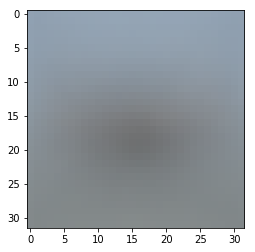

automobile


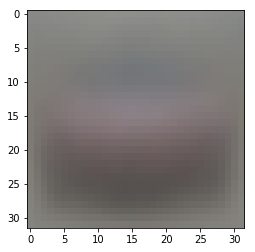

bird


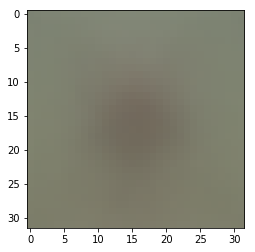

cat


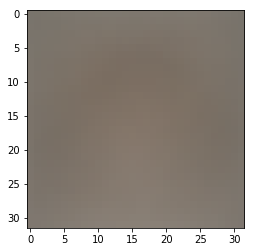

deer


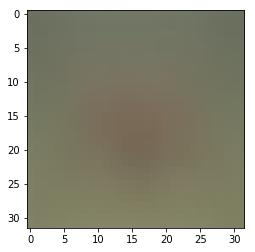

dog


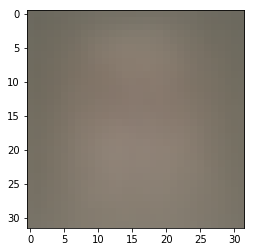

frog


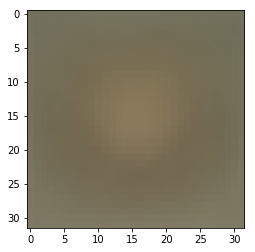

horse


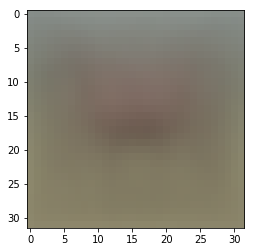

ship


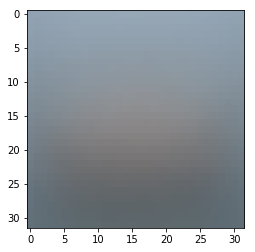

truck


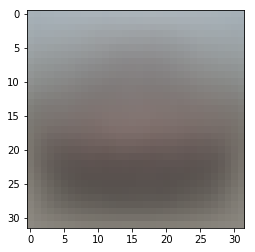

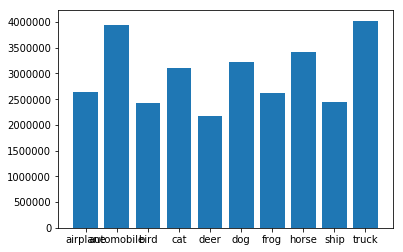

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys
%matplotlib inline

cifar_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class Hw3:
    
    X = [None]*10
    X_mean = [None]*10
    X_centered = [None]*10
    X_pca = [None]*10
    pca_err = [None]*10
    
    def __init__(self):
        self.load()
        
    def unpickle(self, file):
        import pickle
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict

    def load(self):
        
        meta = self.unpickle("cifar-10-batches-py/batches.meta")
        X = pd.DataFrame()
        Y = pd.DataFrame()
        for i in range(1,6):
            data = self.unpickle("cifar-10-batches-py/data_batch_" + str(i))
            X = pd.concat([X, pd.DataFrame(data[b'data']).astype('float32')])
            Y = pd.concat([Y, pd.DataFrame(data[b'labels'])])
        
        X['label'] = Y
        X_groups = X.groupby('label')
        for i in range(0,10):
            self.X[i] = X_groups.get_group(i).drop('label', axis=1).reset_index(drop=True)
            self.X_mean[i] = self.X[i].mean().astype('uint8')
    
    def draw(self, xi):
        img = xi.values.astype('uint8')
        plt.imshow(np.dstack((img[0:1024].reshape(32,32), img[1024:2048].reshape(32,32), img[2048:3072].reshape(32,32))))
        # print(cifar_labels[int(xi[3072])])
        plt.show()
    
    def drawMean(self, label):
        print (cifar_labels[label])
        self.draw(self.X_mean[label])
        
    def computePCA(self, label):
        pca = PCA(n_components=3072)
        self.X_centered[label] = self.X[label] - np.mean(self.X[label], axis=0)
        pca.fit(self.X_centered[label])
        self.X_pca[label] = pca        
        
    def part1_draw_mean(self):
        for i in range(0,10):
            self.drawMean(i)
            
    def part1_compute_pca(self):
        for i in range(0,10):
            self.computePCA(i)        
            
    def part1_calculate_error(self):
        for i in range(0,10):
            components = self.X_pca[i].transform(self.X_centered[i])
            inv = self.X_pca[i].inverse_transform(components)
            var = self.X_pca[i].explained_variance_
            varDF = pd.DataFrame(var)
            varPlot = var[20:3071]
            varPlot = pd.DataFrame(varPlot)
            sumVar = sum(varPlot.values)
            self.pca_err[i] = int(sumVar[0])        
            
    def part1_plot_error(self):
        global cifar_labels
        plt.bar(cifar_labels, self.pca_err)
        
        

hw = Hw3()
hw.part1_draw_mean()
hw.part1_compute_pca()
hw.part1_calculate_error()
hw.part1_plot_error()
